In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('default of credit card clients.csv',index_col=0) #讀檔
data = data.drop('ID')

x=data.drop(columns='Y')
y=data['Y']

from sklearn.preprocessing import MinMaxScaler #正規化
mms = MinMaxScaler()
x = mms.fit_transform(x)
y = np.array(y)
y = y.astype(np.integer)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
from sklearn.model_selection import train_test_split #將x分為兩個部分，0.7為訓練用，0.3為測試用
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=0)
x_train,x_test,y_train,y_test

(array([[2.02020202e-02, 1.00000000e+00, 3.33333333e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.91919192e-01, 0.00000000e+00, 3.33333333e-01, ...,
         1.66183575e-03, 3.07130348e-03, 3.78310691e-03],
        [4.94949495e-01, 1.00000000e+00, 6.66666667e-01, ...,
         4.96682770e-02, 2.03854838e-02, 6.68096681e-03],
        ...,
        [1.21212121e-01, 1.00000000e+00, 5.00000000e-01, ...,
         6.60225443e-03, 0.00000000e+00, 9.45776729e-03],
        [4.04040404e-02, 1.00000000e+00, 5.00000000e-01, ...,
         1.61030596e-03, 2.34450647e-03, 9.45776729e-04],
        [1.31313131e-01, 1.00000000e+00, 1.66666667e-01, ...,
         3.22061192e-03, 5.15791423e-03, 3.78310691e-03]]),
 array([[1.01010101e-02, 0.00000000e+00, 1.66666667e-01, ...,
         2.57648953e-03, 0.00000000e+00, 1.21816043e-03],
        [1.01010101e-02, 1.00000000e+00, 3.33333333e-01, ...,
         0.00000000e+00, 2.34450647e-03, 0.00000000e+00],
        [2.22222222e-01, 

In [3]:
from sklearn import tree
gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state = 1)
gini.fit(x_train, y_train)
print("gini.score=",gini.score(x_train,y_train))

gini.score= 0.8212857142857143


In [4]:
'''from scipy.stats import randint as sp_randint  #隨機搜尋
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)

param_dist = {"max_depth": [3, None],                     #給定list
              "max_features": sp_randint(1, 23),          #給定distribution
              "min_samples_split": sp_randint(2, 23),     #給定distribution
              "bootstrap": [True, False],                 #給定list
              "criterion": ["gini", "entropy"]}           #給定list

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)
clf=random_search.fit(x_train,y_train)
clf.best_params_ '''

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 12,
 'min_samples_split': 19}

In [26]:
'''from sklearn.model_selection import cross_val_score  #交叉驗證
from sklearn import tree
gini_cv = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 1)
gini_cv_scores = cross_val_score(gini_cv, x_train, y_train, cv=5)
gini_cv_scores.mean()'''

0.8192857142857143

In [4]:
from sklearn.metrics import classification_report #每個類的精度、召回率、F1 分數
y_pred = gini.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7060
           1       0.69      0.35      0.47      1940

    accuracy                           0.83      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def perf_measure(y_test, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
           TP += 1
        if y_test[i] == 0 and y_pred[i] == 1:
           FP += 1
        if y_test[i] == 0 and y_pred[i] == 0:
           TN += 1
        if y_test[i] == 1 and y_pred[i] == 0:
           FN += 1
    return TP, FP, FN, TN

cm = perf_measure(y_test, y_pred)
cm = np.array(cm).reshape(2,2)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average = 'weighted') #加權平均
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(cm)
print("Accuracy is",acc)
print("Precision is",pre)
print("Recall is",recall)
print("F1 is",f1)

[[ 686  313]
 [1254 6747]]
Accuracy is 0.8258888888888889
Precision is 0.8095172763064277
Recall is 0.8258888888888889
F1 is 0.8034548742012844


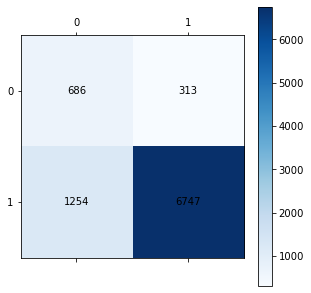

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure',figsize=(5,5))
 
plt.matshow(cm,cmap = plt.cm.Blues) # 背景颜色
plt.colorbar() # 颜色標籤
 
# 内部添加圖例標籤
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[y,x], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')

plt.show()

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini',
                                random_state=1,
                                max_depth=4)
bag = BaggingClassifier(base_estimator=tree,n_estimators=500,
                            max_samples=1.0,
                            max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=1,
                            random_state=1)

bag.fit(x_train, y_train)
print("bag.score=",bag.score(x_train, y_train))

bag.score= 0.8228095238095238


In [31]:
'''from sklearn.model_selection import cross_val_score  #交叉驗證
from sklearn import tree

tree_cv = tree.DecisionTreeClassifier(criterion='gini',
                                random_state=1,
                                max_depth=None)
bag_cv = BaggingClassifier(base_estimator=tree_cv,n_estimators=500,
                            max_samples=1.0,
                            max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=1,
                            random_state=1)
bag_cv_scores = cross_val_score(bag_cv, x_train, y_train, cv=5)
bag_cv_scores.mean()'''

0.8133809523809525

In [39]:
'''n_samples = data.shape[0] #網格搜尋：這裡輸出的結果是錯的(程式是對的)，正確的結果在另一個人手上，因為電腦會當機沒有再跑過
n_features = data.shape[1]

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
params = {'base_estimator': [None, tree.DecisionTreeClassifier(criterion='gini',
                                random_state=1,
                                max_depth=None), tree.DecisionTreeClassifier(criterion='entropy',
                                random_state=1,
                                max_depth=None)],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0, n_samples//2,],
          'max_features': [0.5,1.0, n_features//2,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingClassifier(random_state=1, n_jobs=1), param_grid =params, cv=3, n_jobs=1, verbose=1)
bag_gs = bagging_regressor_grid.fit(x_train, y_train)
bag_gs.best_params_'''

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fail

C:\Users\a0976\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80461905 0.80709524 0.80714286 0.80342857 0.80752381 0.8062381
        nan        nan        nan 0.80957143 0.81280952 0.81419048
 0.80585714 0.8122381  0.81180952        nan        nan        nan
 0.80552381 0.80866667 0.80833333 0.80338095 0.80771429 0.80680952
        nan        nan        nan 0.80042857 0.80509524 0.80680952
 0.79809524 0.80409524 0.8077619         nan        nan        nan
 0.8122381  0.81395238 0.81338095 0.80961905 0.81219048 0.81209524
        nan        nan        nan 0.8        0.80452381 0.80919048
 0.80047619 0.80652381 0.80909524        nan        nan        nan
 0.80180952 0.80538095 0.80728571 0.80219048 0.80519048 0.8047619
        nan        nan        nan 0.80885714 0.81414286 0.81485714
 0.80119048 0.80738095 0.80757143        nan        nan        nan
 0.80185714 0.80571429 0.80785714 0.80214286 0.80619048

GridSearchCV(cv=3, estimator=BaggingClassifier(n_jobs=-1, random_state=1),
             n_jobs=1,
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(random_state=1),
                                            DecisionTreeClassifier(criterion='entropy',
                                                                   random_state=1)],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0, 12],
                         'max_samples': [0.5, 1.0, 15000],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [46]:
from sklearn.metrics import classification_report #每個類的精度、召回率、F1 分數
y_pred = bag.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      7060
           1       0.68      0.36      0.47      1940

    accuracy                           0.83      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average = 'weighted') #加權平均
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

def perf_measure(y_test, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
           TP += 1
        if y_test[i] == 0 and y_pred[i] == 1:
           FP += 1
        if y_test[i] == 0 and y_pred[i] == 0:
           TN += 1
        if y_test[i] == 1 and y_pred[i] == 0:
           FN += 1

    return TP, FP, FN, TN

cm = perf_measure(y_test, y_pred)
cm = np.array(cm).reshape(2,2)

#cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is",acc)
print("Precision is",pre)
print("Recall is",recall)
print("F1 is",f1)

[[ 690  323]
 [1250 6737]]
Accuracy is 0.8252222222222222
Precision is 0.8085001138256929
Recall is 0.8252222222222222
F1 is 0.803173036884874


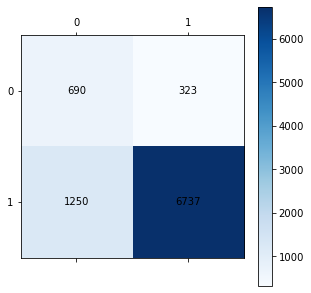

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure',figsize=(5,5))
 
plt.matshow(cm,cmap = plt.cm.Blues) # 背景颜色
plt.colorbar() # 颜色標籤
 
# 内部添加圖例標籤
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[y,x], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center')

plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state = 50, min_samples_leaf = 10)

rfc.fit(x_train, y_train)
print("rfc.score=",rfc.score(x_train, y_train))

rfc.score= 0.8517142857142858


In [10]:
'''from sklearn.model_selection import cross_val_score  #交叉驗證
from sklearn.ensemble import RandomForestClassifier
rfc_cv = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state = 50, min_samples_leaf = 10)
rfc_cv_scores = cross_val_score(rfc_cv, x_train, y_train, cv=5)
rfc_cv_scores.mean()'''

0.8181904761904761

In [37]:
'''from sklearn.model_selection import GridSearchCV #網格搜尋
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state = 50, min_samples_leaf = 10)#隨機森林分類器

parameters = {
    'n_estimators': [25, 30, 35], 
    'criterion': ("gini", "entropy")}

rf_gs = GridSearchCV(rfc, parameters,
                        cv=3,
                        verbose=2,
                        refit=False,
                        n_jobs=1,
                        return_train_score=False)
rf_gs.fit(x_train, y_train)
rf_gs.best_params_'''

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=25; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=30; total time=   0.5s
[CV] END ....................criterion=gini, n_estimators=35; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=35; total time=   0.6s
[CV] END ....................criterion=gini, n_estimators=35; total time=   0.6s
[CV] END .................criterion=entropy, n_estimators=25; total time=   0.6s
[CV] END .................criterion=entropy, n_estimators=25; total time=   0.7s
[CV] END .................criterion=entropy, n_es

{'criterion': 'entropy', 'n_estimators': 35}

In [50]:
from sklearn.metrics import classification_report #每個類的精度、召回率、F1 分數
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.46      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average = 'weighted') #加權平均
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

def perf_measure(y_test, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
           TP += 1
        if y_test[i] == 0 and y_pred[i] == 1:
           FP += 1
        if y_test[i] == 0 and y_pred[i] == 0:
           TN += 1
        if y_test[i] == 1 and y_pred[i] == 0:
           FN += 1

    return TP, FN, FP, TN

cm = perf_measure(y_test, y_pred)
cm = np.array(cm).reshape(2,2)

#cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is",acc)
print("Precision is",pre)
print("Recall is",recall)
print("F1 is",f1)

[[ 689 1251]
 [ 339 6721]]
Accuracy is 0.8233333333333334
Precision is 0.8058186467161654
Recall is 0.8233333333333334
F1 is 0.8015497098253884


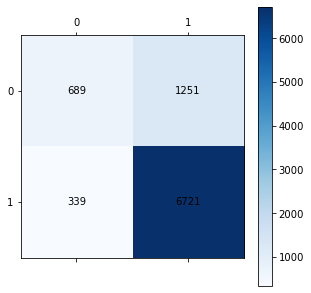

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure',figsize=(5,5))
 
plt.matshow(cm,cmap = plt.cm.Blues) # 背景颜色
plt.colorbar() # 颜色標籤
 
# 内部添加圖例標籤
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[y,x], xy = (x,y), horizontalalignment = 'center', verticalalignment = 'center' )
        

plt.show()

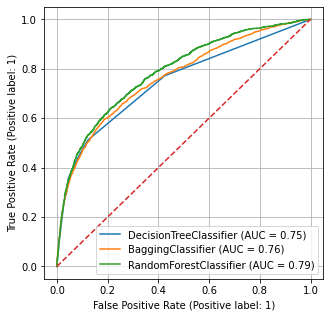

In [52]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
gini_disp = plot_roc_curve(gini, x_test, y_test, ax=ax)
bag_disp.plot(ax=ax)
rfc_disp.plot(ax=ax)

plt.plot([0,1],linestyle='--')
plt.grid()
plt.legend()
plt.show()

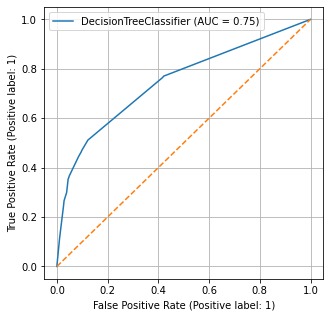

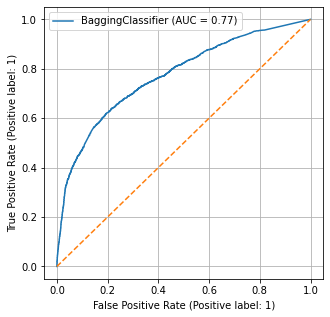

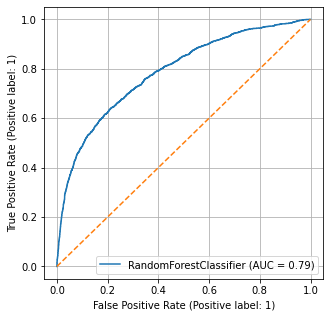

In [54]:
from sklearn.metrics import plot_roc_curve

gini_disp = plot_roc_curve(gini, x_test, y_test)
plt.plot([0,1],linestyle='--')
plt.grid()
plt.legend()

bag_disp = plot_roc_curve(bag, x_test, y_test)
plt.plot([0,1],linestyle='--')
plt.grid()
plt.legend()

rfc_disp = plot_roc_curve(rfc, x_test, y_test)
plt.plot([0,1],linestyle='--')
plt.grid()
plt.legend()

plt.show()

不違約 77.88 % of the dataset
違約 22.12 % of the dataset


C:\Users\a0976\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distributions \n (0:Credible || 1:NoCredible )')

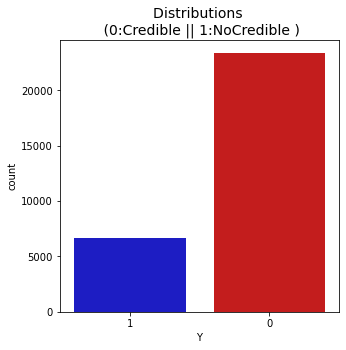

In [57]:
#資料檢視
import seaborn as sns 
import matplotlib.pyplot as plt
print('不違約', round(data['Y'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('違約', round(data['Y'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

# 看看y變數的分佈
colors = ["#0101DF", "#DF0101"]
sns.countplot('Y', data=data, palette=colors)
plt.title('Distributions \n (0:Credible || 1:NoCredible )', fontsize=14)